<a href="https://colab.research.google.com/github/shahidulislam-cse/Cyberbulling-Bangla/blob/main/Cyberbullying_Bangla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyberbullying

Bismillahir Rahmanir Raheem

Author: **Shahidul Islam Zahid**

Problem: **Cyberbulling for Bangla Language**

Model:


Date:  **07.03.2023**

# Import and Download Package

In [5]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
## Base Libs 
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
import re
## ntlk 
import nltk
from nltk.stem import 	WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk import sent_tokenize
## Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
## Others
from autocorrect import Speller
from tqdm import tqdm, trange
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [7]:
## Download Packages we need from nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Read Files

In [10]:
## Load Data file (.xlxs)
train = pd.read_excel('cyberbulling_bangla_dataset.xlsx')



# Data Preprocessing

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44001 entries, 0 to 44000
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comment               44001 non-null  object 
 1   Category              44001 non-null  object 
 2   Gender                44001 non-null  object 
 3   comment react number  43998 non-null  float64
 4   label                 44001 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [13]:
train['label'].value_counts()

not bully    15340
troll        10462
sexual        8927
religious     7578
threat        1694
Name: label, dtype: int64

In [14]:
train.shape

(44001, 5)

In [15]:
train.isna().sum()

comment                 0
Category                0
Gender                  0
comment react number    3
label                   0
dtype: int64

In [16]:
train = train.dropna() #Handled Missing values by droping those rows

In [17]:
train.isna().sum()

comment                 0
Category                0
Gender                  0
comment react number    0
label                   0
dtype: int64

In [18]:
train.shape

(43998, 5)

In [19]:
train.reset_index(inplace=True)
train.head()

,index,comment,Category,Gender,comment react number,label
0,0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,Politician,male,1.0,religious
1,1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,Politician,Male,1.0,not bully
4,4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,Politician,Male,3.0,troll


In [20]:
train['comment'][0]

'আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থাকবে, ততো দিন এই রকম হত্যাকান্ড ঘটবে। তাই জনগণকে সঙ্গে নিয়ে আওয়ামী লীগের পতন ঘটাবো ইনশাআল্লাহ'

In [21]:
train = train.drop(['Category','Gender','comment react number'],axis = 1)

In [22]:
## Display df
train.head()

,index,comment,label
0,0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,religious
1,1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,not bully
4,4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,troll


<AxesSubplot:>

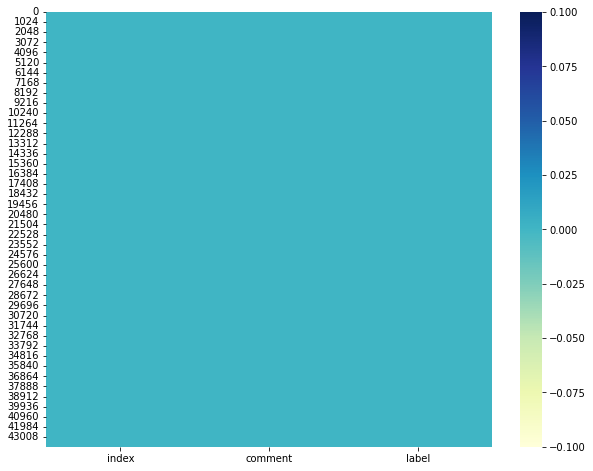

In [23]:
plt.figure(figsize = (10,8))
sns.heatmap(train.isnull(),cmap='YlGnBu')

# (Text) Preprosesing

In [24]:
### Texts Preprocesing ###
def CleanText(text):
## Stop words
  stop_words  = set(stopwords.words("english"))
## Stemmer
  lemmatizer = WordNetLemmatizer()
  #stemmer  = PorterStemmer() 
## Text to string
  string=str(text)
## Text to Lower case
  text = string.lower().split()
## Join splits
  text = " ".join(text)
## Resub unessential 
  text = re.sub(r'[^0-9a-zA-Z]+',' ',text)
  text=re.sub(r'#\w*', '', text)
  text=re.sub(r'(?<![\w\-])\w(?![\w\-])', '', text)
  text=re.sub(r'\s+[a-zA-Z]\s+', '', text)
  text=re.sub(r'(RT|rt|FAV|fav|VIA|via)', '', text)
  text=re.sub(r'(RT|rt|FAV|fav|VIA|via)', '', text)
  text = re.sub(r"http(\S)+",' ',text)    
  text = re.sub(r"www(\S)+",' ',text)
  text=re.sub(r'@\w*', '', text)
  text = re.sub(r"&",' and ',text) 
  try:
    text=re.sub(r'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])', '', text)
  except re.error:
    text=re.sub(r'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])', '', text)
  token= nltk.word_tokenize(text)     
  token = [w for w in token if not w in stop_words]
  #text = ' '.join([stemmer.stem(w) for w in token])
  text = ' '.join([lemmatizer.lemmatize(w) for w in token])    
  return text

In [25]:
## Apply CleanText for each tweet
##train['tweet'] = train['tweet'].map(lambda x: CleanText(x))

# TF-IDF

# Term Frequency(TF) = [number of times word appeared / total no of words in a document]


TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.



# Term Frequency(TF) = [number of times word appeared / total no of words in a document]



Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.



IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.



# Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]



In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.





# TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    #code here
]

**Vectorization (Convert Text data into the Vector)**

# ED on train

In [26]:
train.head()

,index,comment,label
0,0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,religious
1,1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,not bully
4,4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,troll


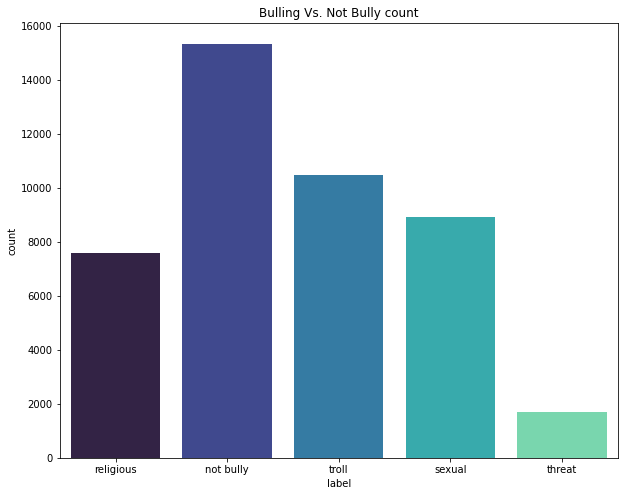

In [27]:
plt.figure(figsize = (10,8))
sns.countplot(x='label', data = train, palette = 'mako',saturation = 1)
plt.title("Bulling Vs. Not Bully count", fontsize = 12)
plt.show()

In [28]:

## unigram

texts = ''.join(str(train['tweet'].tolist()))
tokenized = texts.split()
unigram = (pd.Series(nltk.ngrams(tokenized, 1)).value_counts())[:50]
unigram.sort_values().plot.barh(width=.9,color='lightblue',figsize=(10, 8))
plt.title('50 Most Frequently Unigrams')
plt.ylabel('Unigram')
plt.xlabel('No: of Occurances')
     

KeyError: ignored

In [29]:

## Total number of words
train['words'] = train['tweet'].apply(lambda x: len(x.split()))
## Total number of words(unique)
train['unique_words'] = train['tweet'].apply(lambda x: len(set(x.split())))
## Total number of words(characters)
train['char'] = train['tweet'].apply(lambda x: len(x))

KeyError: ignored

In [30]:

train.head()

,index,comment,label
0,0,আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...,religious
1,1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,not bully
2,2,"অরে বাবা, এই টা কোন পাগল????",not bully
3,3,১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...,not bully
4,4,যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...,troll


In [31]:

## WordCloud
texts_bulling = " ".join(train[train['label']=='bulling']['comment'])
texts_notbulling = " ".join(train[train['label']=='notbulling']['comment'])

# Word Cloud

In [32]:
plt.figure(figsize=(12,8))
wcbull = WordCloud(max_words = 400 , width = 1600, height = 800,background_color="white",collocations=False).generate(texts_bulling)
plt.title("Word Cloud of Bulling")
plt.imshow(wcbull , interpolation = 'bilinear')

ValueError: ignored

<Figure size 864x576 with 0 Axes>

In [33]:
plt.figure(figsize=(12,8))
wcnotbull = WordCloud(max_words = 400 , width = 1600, height = 800,background_color="white",collocations=False).generate(texts_bulling)
plt.title("Word Cloud of  Not Bulling")
plt.imshow(wcnotbull , interpolation = 'bilinear')

ValueError: ignored

<Figure size 864x576 with 0 Axes>

# Analysis using wordcloud:

# Training Models :

# Model Evaluation

# Prediction Pipeline